In [84]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
# Reading the data
df_export = pd.read_csv('2018-2010_export.csv')
df_import = pd.read_csv('2018-2010_import.csv')

In [86]:
df_export.head()

,HSCode,Commodity,value,country,year
0,2,MEAT AND EDIBLE MEAT OFFAL.,0.18,AFGHANISTAN TIS,2018
1,3,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",0.00,AFGHANISTAN TIS,2018
2,4,DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...,12.48,AFGHANISTAN TIS,2018
3,6,LIVE TREES AND OTHER PLANTS; BULBS; ROOTS AND ...,0.00,AFGHANISTAN TIS,2018
4,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,1.89,AFGHANISTAN TIS,2018


In [87]:
df_import.head()

,HSCode,Commodity,value,country,year
0,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",0.00,AFGHANISTAN TIS,2018
1,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,12.38,AFGHANISTAN TIS,2018
2,8,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...,268.60,AFGHANISTAN TIS,2018
3,9,"COFFEE, TEA, MATE AND SPICES.",35.48,AFGHANISTAN TIS,2018
4,11,PRODUCTS OF THE MILLING INDUSTRY; MALT; STARCH...,NaN,AFGHANISTAN TIS,2018


In [88]:
print(df_export.isnull().sum())
print(df_import.isnull().sum())

HSCode           0
Commodity        0
value        14038
country          0
year             0
dtype: int64
HSCode           0
Commodity        0
value        14027
country          0
year             0
dtype: int64


In [89]:
print(df_export['country'].unique())
print('\n')
print(df_import['country'].unique())
# As we can see, in the 'country' column there are some unspecified values

['AFGHANISTAN TIS' 'ALBANIA' 'ALGERIA' 'AMERI SAMOA' 'ANDORRA' 'ANGOLA'
 'ANGUILLA' 'ANTARTICA' 'ANTIGUA' 'ARGENTINA' 'ARMENIA' 'ARUBA'
 'AUSTRALIA' 'AUSTRIA' 'AZERBAIJAN' 'BAHAMAS' 'BAHARAIN IS'
 'BANGLADESH PR' 'BARBADOS' 'BELARUS' 'BELGIUM' 'BELIZE' 'BENIN' 'BERMUDA'
 'BHUTAN' 'BOLIVIA' 'BOSNIA-HRZGOVIN' 'BOTSWANA' 'BR VIRGN IS' 'BRAZIL'
 'BRUNEI' 'BULGARIA' 'BURKINA FASO' 'BURUNDI' 'C AFRI REP' 'CAMBODIA'
 'CAMEROON' 'CANADA' 'CAPE VERDE IS' 'CAYMAN IS' 'CHAD' 'CHILE'
 'CHINA P RP' 'COLOMBIA' 'COMOROS' 'CONGO D. REP.' 'CONGO P REP' 'COOK IS'
 'COSTA RICA' "COTE D' IVOIRE" 'CROATIA' 'CUBA' 'CURACAO' 'CYPRUS'
 'CZECH REPUBLIC' 'DENMARK' 'DJIBOUTI' 'DOMINIC REP' 'DOMINICA' 'ECUADOR'
 'EGYPT A RP' 'EL SALVADOR' 'EQUTL GUINEA' 'ERITREA' 'ESTONIA' 'ETHIOPIA'
 'FALKLAND IS' 'FAROE IS.' 'FIJI IS' 'FINLAND' 'FR GUIANA' 'FR POLYNESIA'
 'FRANCE' 'GABON' 'GAMBIA' 'GEORGIA' 'GERMANY' 'GHANA' 'GIBRALTAR'
 'GREECE' 'GREENLAND' 'GRENADA' 'GUADELOUPE' 'GUAM' 'GUATEMALA' 'GUERNSEY'
 'GUINEA' 'GUINEA

In [90]:
print('Export data')
print(100*(df_export.isnull().sum()/df_export.shape[0]))
print('\n')
print('Import data')
print(100*(df_import.isnull().sum()/df_import.shape[0]))
# So the 'value' column in export and import data have nearly 10% and 15% null values respectively.

Export data
HSCode        0.000000
Commodity     0.000000
value        10.244995
country       0.000000
year          0.000000
dtype: float64


Import data
HSCode        0.000000
Commodity     0.000000
value        15.067404
country       0.000000
year          0.000000
dtype: float64


#### In the 'country' column where the country hasn't been specified, we can drop
#### them and in the 'value' column where we have null values we can drop them
#### as well.

In [91]:
processed_df_export = df_export[df_export['country'] != 'UNSPECIFIED']
processed_df_import = df_import[df_import['country'] != 'UNSPECIFIED']

In [92]:
processed_df_export.dropna(inplace = True)
processed_df_import.dropna(inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [93]:
processed_df_export['year'] = pd.Categorical(processed_df_export['year'])
processed_df_import['year'] = pd.Categorical(processed_df_import['year'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'YEAR')

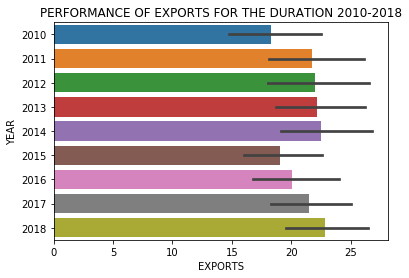

In [94]:
sns.barplot(x = processed_df_export['value'], y = processed_df_export['year'])
plt.title('PERFORMANCE OF EXPORTS FOR THE DURATION 2010-2018')
plt.xlabel('EXPORTS')
plt.ylabel('YEAR')

Text(0, 0.5, 'YEAR')

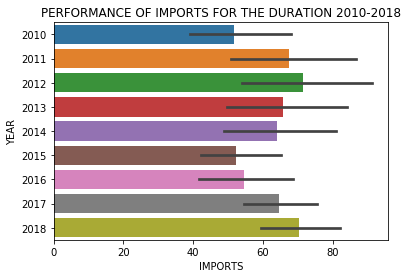

In [95]:
sns.barplot(x = processed_df_import['value'], y = processed_df_import['year'])
plt.title('PERFORMANCE OF IMPORTS FOR THE DURATION 2010-2018')
plt.xlabel('IMPORTS')
plt.ylabel('YEAR')

#### We can see that there exists some correlation between the exports and the imports. They increase
#### and decrease in the same years. The probable reason can be that the money that is earned through
#### exports is used to pay for imported products.

#### The important thing been if we look at both the graphs, we can see for the time period 14-18, both
#### the exports and the imports have an increasing pattern which is good for an economy.

In [96]:
slice_of_export = processed_df_export.groupby('country').sum().sort_values(by = 'value', ascending = False).head(10)

In [97]:
slice_of_import = processed_df_import.groupby('country').sum().sort_values(by = 'value', ascending = False).head(10)

Text(0, 0.5, 'COUNTRY')

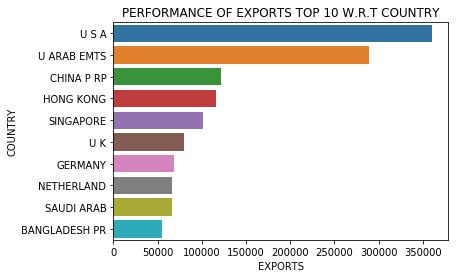

In [98]:
sns.barplot(x = slice_of_export['value'], y = slice_of_export.index)
plt.title('PERFORMANCE OF EXPORTS TOP 10 W.R.T COUNTRY')
plt.xlabel('EXPORTS')
plt.ylabel('COUNTRY')

Text(0, 0.5, 'COUNTRY')

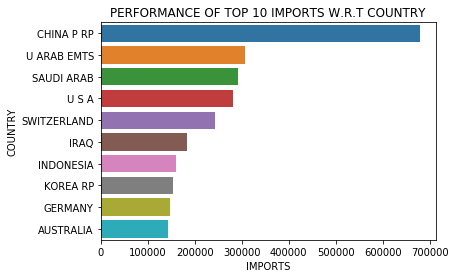

In [99]:
sns.barplot(x = slice_of_import['value'], y = slice_of_import.index)
plt.title('PERFORMANCE OF TOP 10 IMPORTS W.R.T COUNTRY')
plt.xlabel('IMPORTS')
plt.ylabel('COUNTRY')

In [100]:
commodity_export = df_export.groupby('Commodity').sum().sort_values(by = 'value', ascending = False).head(10)
commodity_import = df_import.groupby('Commodity').sum().sort_values(by = 'value', ascending = False).head(10)

Text(0, 0.5, 'EXPORTED COMMODITY')

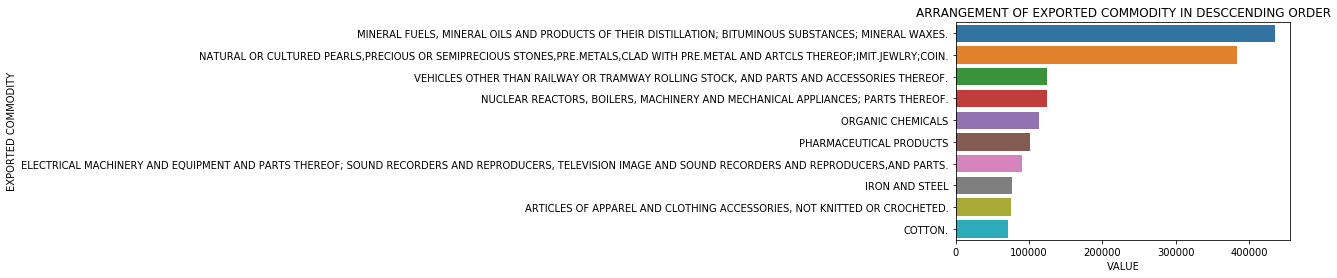

In [101]:
sns.barplot(x = commodity_export['value'], y = commodity_export.index)
plt.title('ARRANGEMENT OF EXPORTED COMMODITY IN DESCCENDING ORDER')
plt.xlabel('VALUE')
plt.ylabel('EXPORTED COMMODITY')

Text(0, 0.5, 'IMPORTED COMMODITY')

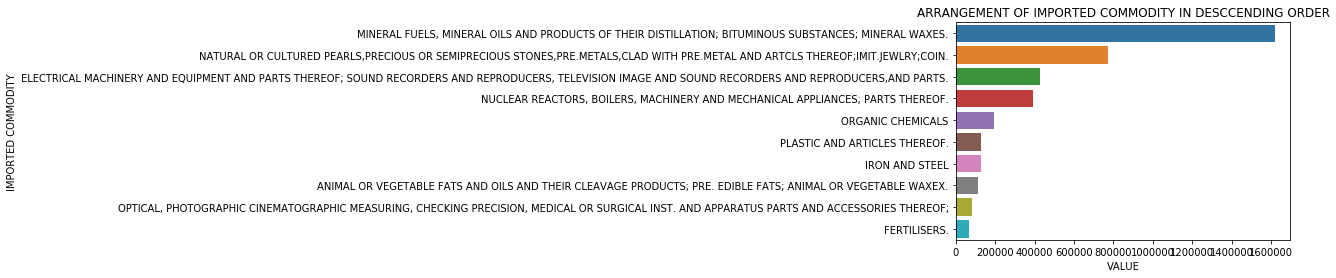

In [102]:
sns.barplot(x = commodity_import['value'], y = commodity_import.index)
plt.title('ARRANGEMENT OF IMPORTED COMMODITY IN DESCCENDING ORDER')
plt.xlabel('VALUE')
plt.ylabel('IMPORTED COMMODITY')